In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load the iris dataset from seaborn
iris = sns.load_dataset('iris')

# Display the first few rows of the dataset
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


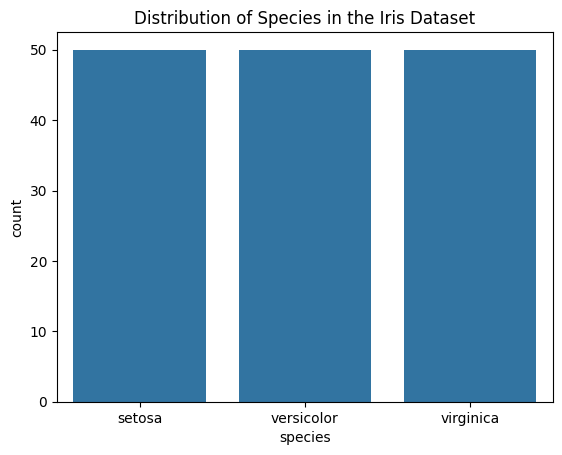

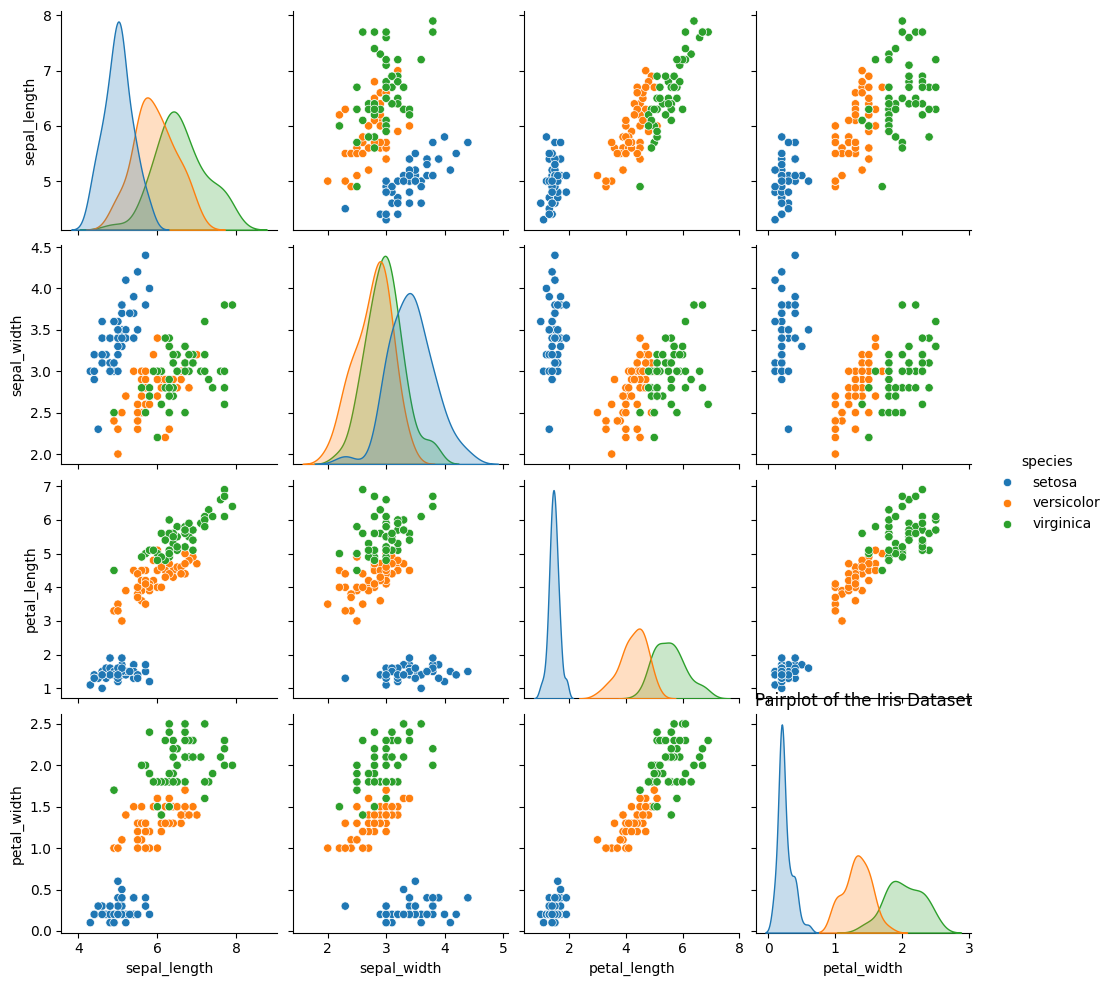

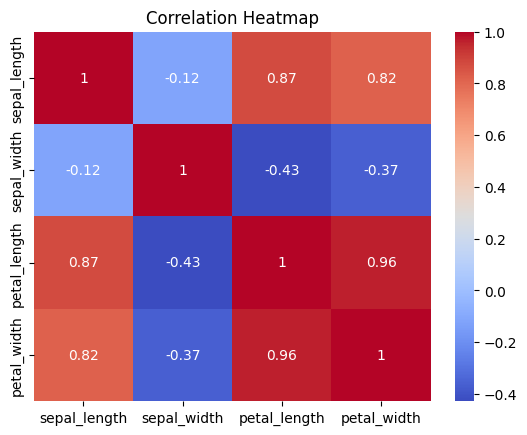

In [4]:
# Statistical description of the dataset
print(iris.describe())

# Distribution of classes
sns.countplot(x='species', data=iris)
plt.title('Distribution of Species in the Iris Dataset')
plt.show()

# Pairplot to visualize relationships between features
sns.pairplot(iris, hue='species')
plt.title('Pairplot of the Iris Dataset')
plt.show()

# Heatmap to visualize correlation between features
sns.heatmap(iris.drop('species', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [5]:
# Separate features and target variable
X = iris.drop(columns='species')
y = iris['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Create the k-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [7]:
# Predict the labels of the test set
y_pred = knn.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Model Accuracy: 1.00
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

